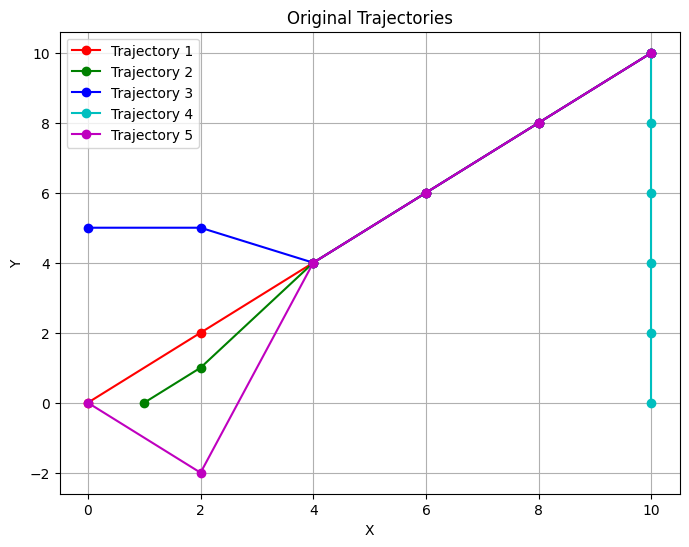

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic trajectories with common sub-trajectories
def generate_trajectories():
    trajectories = []
    
    # Trajectory 1: Linear from (0, 0) to (10, 10)
    traj1 = np.array([[0, 0], [2, 2], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 2: Linear with common sub-trajectory from (4, 4) to (10, 10)
    traj2 = np.array([[1, 0], [2, 1], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 3: Non-linear with common sub-trajectory from (4, 4) to (10, 10)
    traj3 = np.array([[0, 5], [2, 5], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 4: Linear from (10, 0) to (10, 10)
    traj4 = np.array([[10, 0], [10, 2], [10, 4], [10, 6], [10, 8], [10, 10]])
    
    # Trajectory 5: Zig-zag trajectory with a common sub-trajectory
    traj5 = np.array([[0, 0], [2, -2], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    trajectories = [traj1, traj2, traj3, traj4, traj5]
    return trajectories

trajectories = generate_trajectories()

# Visualize the original trajectories
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']
for i, traj in enumerate(trajectories):
    plt.plot(traj[:, 0], traj[:, 1], marker='o', color=colors[i], label=f'Trajectory {i+1}')
    
plt.title('Original Trajectories')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Calculate perpendicular and angle distance between two points
def perpendicular_distance(p1, p2, p):
    if np.array_equal(p1, p2):
        return np.linalg.norm(p - p1)
    return np.linalg.norm(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)

def angle_distance(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.arccos(np.clip(cos_theta, -1.0, 1.0))

# Approximate MDL partitioning algorithm
def approximate_trajectory_partitioning(trajectory, epsilon=0.5):
    CP = [0]  # Characteristic points, starts with the first point
    start = 0
    
    while start < len(trajectory) - 1:
        best_mdl = float('inf')
        end = start + 1
        for i in range(start + 1, len(trajectory)):
            mdl_par = perpendicular_distance(trajectory[start], trajectory[i], trajectory[start + 1])
            if mdl_par < best_mdl:
                best_mdl = mdl_par
                end = i
        CP.append(end)
        start = end
    
    return CP

In [10]:
# Use the partitioning function from the previous step
def partition_trajectories(trajectories):
    partitions = []
    for traj in trajectories:
        CP_indices = approximate_trajectory_partitioning(traj)
        partitioned_segments = [(traj[i], traj[i+1]) for i in CP_indices[:-1]]
        partitions.extend(partitioned_segments)
    return partitions

partitions = partition_trajectories(trajectories)

# Print partitioned segments
for i, seg in enumerate(partitions):
    print(f"Segment {i+1}: Start {seg[0]}, End {seg[1]}")

Segment 1: Start [0 0], End [2 2]
Segment 2: Start [2 2], End [4 4]
Segment 3: Start [4 4], End [6 6]
Segment 4: Start [6 6], End [8 8]
Segment 5: Start [8 8], End [10 10]
Segment 6: Start [1 0], End [2 1]
Segment 7: Start [2 1], End [4 4]
Segment 8: Start [4 4], End [6 6]
Segment 9: Start [6 6], End [8 8]
Segment 10: Start [8 8], End [10 10]
Segment 11: Start [0 5], End [2 5]
Segment 12: Start [2 5], End [4 4]
Segment 13: Start [4 4], End [6 6]
Segment 14: Start [6 6], End [8 8]
Segment 15: Start [8 8], End [10 10]
Segment 16: Start [10  0], End [10  2]
Segment 17: Start [10  2], End [10  4]
Segment 18: Start [10  4], End [10  6]
Segment 19: Start [10  6], End [10  8]
Segment 20: Start [10  8], End [10 10]
Segment 21: Start [0 0], End [ 2 -2]
Segment 22: Start [ 2 -2], End [4 4]
Segment 23: Start [4 4], End [6 6]
Segment 24: Start [6 6], End [8 8]
Segment 25: Start [8 8], End [10 10]


In [12]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on line segments
def line_segment_clustering(segments, eps=0.5, min_samples=2):
    # Convert the segments into a format suitable for clustering (reshape into 4D)
    segments = np.array(segments).reshape(-1, 4)
    
    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(segments)
    
    return clusters

In [13]:
# Cluster the line segments
segments = [np.concatenate(seg).reshape(-1) for seg in partitions]  # Flatten segments for clustering
clusters = line_segment_clustering(segments, eps=2, min_samples=2)

# Print the clusters
print("Cluster labels for segments:", clusters)

Cluster labels for segments: [ 0  1  2  3  4  0  1  2  3  4 -1 -1  2  3  4 -1 -1 -1 -1  4 -1 -1  2  3
  4]


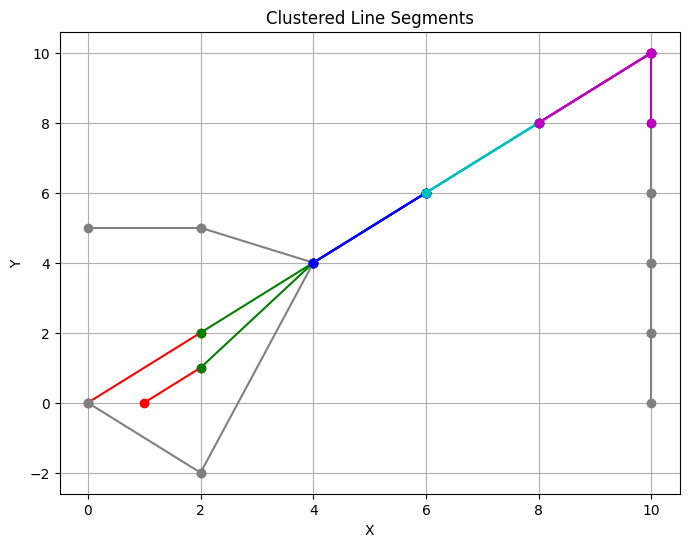

In [14]:
# Visualization of clustered segments
plt.figure(figsize=(8, 6))
for i, seg in enumerate(partitions):
    start, end = seg
    cluster_id = clusters[i]
    color = colors[cluster_id % len(colors)] if cluster_id != -1 else 'gray'
    plt.plot([start[0], end[0]], [start[1], end[1]], color=color, marker='o')

plt.title('Clustered Line Segments')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

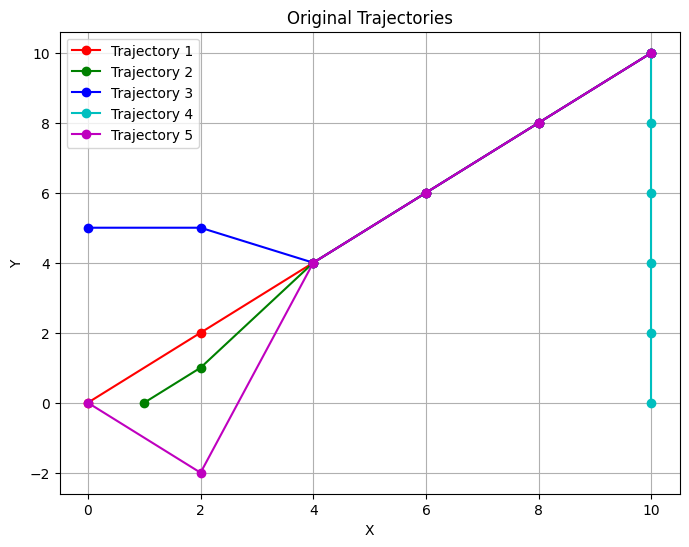

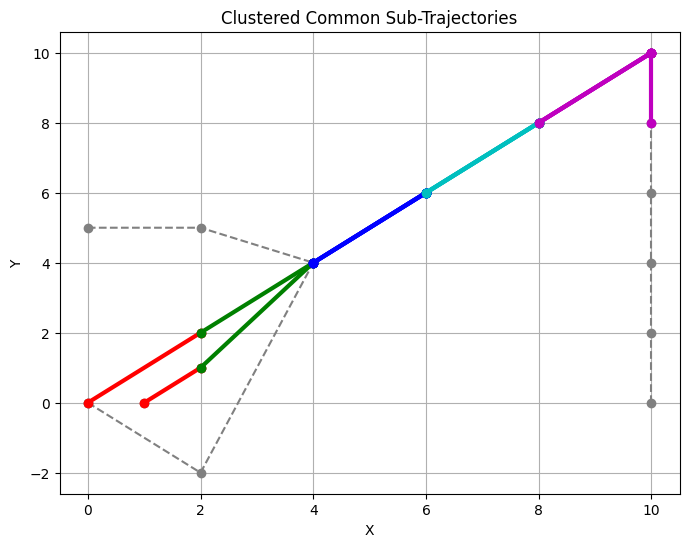

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Create example trajectories
def generate_trajectories():
    trajectories = []
    
    # Trajectory 1: Linear from (0, 0) to (10, 10)
    traj1 = np.array([[0, 0], [2, 2], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 2: Linear with common sub-trajectory from (4, 4) to (10, 10)
    traj2 = np.array([[1, 0], [2, 1], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 3: Non-linear with common sub-trajectory from (4, 4) to (10, 10)
    traj3 = np.array([[0, 5], [2, 5], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    # Trajectory 4: Linear from (10, 0) to (10, 10)
    traj4 = np.array([[10, 0], [10, 2], [10, 4], [10, 6], [10, 8], [10, 10]])
    
    # Trajectory 5: Zig-zag trajectory with a common sub-trajectory
    traj5 = np.array([[0, 0], [2, -2], [4, 4], [6, 6], [8, 8], [10, 10]])
    
    trajectories = [traj1, traj2, traj3, traj4, traj5]
    return trajectories

# Partition the trajectories into line segments
def partition_trajectories(trajectories):
    segments = []
    for traj in trajectories:
        for i in range(len(traj) - 1):
            segments.append((traj[i], traj[i+1]))
    return segments

# Perform DBSCAN clustering on the segments
def line_segment_clustering(segments, eps=2, min_samples=2):
    segments = np.array([np.concatenate(seg).reshape(-1) for seg in segments])
    
    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(segments)
    
    return clusters

# Visualization of the original trajectories
def visualize_trajectories(trajectories):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'c', 'm']
    for i, traj in enumerate(trajectories):
        plt.plot(traj[:, 0], traj[:, 1], marker='o', color=colors[i], label=f'Trajectory {i+1}')
    
    plt.title('Original Trajectories')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualization of clustered common sub-trajectories
def visualize_clusters(segments, clusters, trajectories):
    plt.figure(figsize=(8, 6))
    
    # Plot original trajectories
    for traj in trajectories:
        plt.plot(traj[:, 0], traj[:, 1], 'gray', linestyle='--', marker='o')
    
    # Plot clustered segments
    colors = ['r', 'g', 'b', 'c', 'm']
    for i, (start, end) in enumerate(segments):
        cluster_id = clusters[i]
        if cluster_id != -1:  # Ignore noise (-1)
            color = colors[cluster_id % len(colors)]
            plt.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=3, marker='o')
    
    plt.title('Clustered Common Sub-Trajectories')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Main script to run
trajectories = generate_trajectories()
visualize_trajectories(trajectories)

segments = partition_trajectories(trajectories)
clusters = line_segment_clustering(segments, eps=2, min_samples=2)
visualize_clusters(segments, clusters, trajectories)

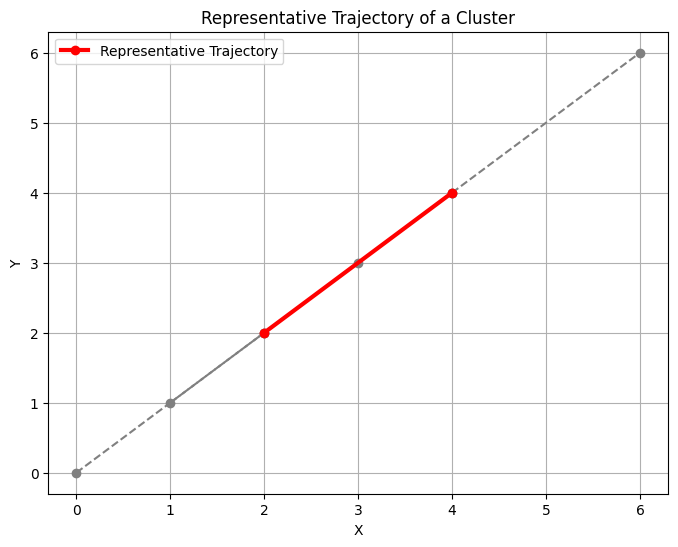

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the average direction vector of a cluster
def average_direction_vector(cluster_segments):
    # Calculate direction vectors for each segment
    direction_vectors = [end - start for start, end in cluster_segments]
    
    # Compute the average direction vector
    avg_direction = np.mean(direction_vectors, axis=0)
    avg_direction /= np.linalg.norm(avg_direction)  # Normalize the vector
    return avg_direction

# Function to rotate points based on the average direction vector
def rotate_points(points, avg_direction):
    angle = np.arctan2(avg_direction[1], avg_direction[0])
    rotation_matrix = np.array([[np.cos(angle), np.sin(angle)],
                                [-np.sin(angle), np.cos(angle)]])
    
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points, angle

# Function to generate representative trajectory for a cluster
def representative_trajectory(cluster_segments, min_lns=2, smoothing_threshold=1.0):
    # Get the average direction vector of the cluster
    avg_direction = average_direction_vector(cluster_segments)
    
    # Collect all the points in the cluster
    all_points = np.array([pt for segment in cluster_segments for pt in segment])
    
    # Rotate the points so the X-axis aligns with the average direction vector
    rotated_points, angle = rotate_points(all_points, avg_direction)
    
    # Sort the points by the rotated X-axis value
    rotated_points = rotated_points[np.argsort(rotated_points[:, 0])]
    
    # Sweep through the points to calculate average points along the representative trajectory
    representative_points = []
    start_idx = 0
    
    while start_idx < len(rotated_points):
        # Find points within a sweep window
        window_points = []
        end_idx = start_idx
        while end_idx < len(rotated_points) and rotated_points[end_idx, 0] - rotated_points[start_idx, 0] < smoothing_threshold:
            window_points.append(rotated_points[end_idx])
            end_idx += 1
        
        # Compute the average point in the window if we have enough points
        if len(window_points) >= min_lns:
            avg_point = np.mean(window_points, axis=0)
            representative_points.append(avg_point)
        
        start_idx = end_idx
    
    # Rotate the representative points back to the original coordinate system
    rotation_matrix_inverse = np.array([[np.cos(-angle), np.sin(-angle)],
                                        [-np.sin(-angle), np.cos(-angle)]])
    representative_points = np.dot(representative_points, rotation_matrix_inverse.T)
    
    return np.array(representative_points)



# Example: Segments in a cluster (replace with actual clustered segments)
cluster_segments = [
    (np.array([0, 0]), np.array([2, 2])),
    (np.array([1, 1]), np.array([3, 3])),
    (np.array([2, 2]), np.array([4, 4])),
    (np.array([4, 4]), np.array([6, 6]))
]

# Generate the representative trajectory for the cluster
rep_traj = representative_trajectory(cluster_segments)

# Visualize the representative trajectory along with the original segments
plt.figure(figsize=(8, 6))

# Plot the original segments
for start, end in cluster_segments:
    plt.plot([start[0], end[0]], [start[1], end[1]], 'gray', linestyle='--', marker='o')

# Plot the representative trajectory
plt.plot(rep_traj[:, 0], rep_traj[:, 1], 'r', linewidth=3, marker='o', label="Representative Trajectory")

plt.title('Representative Trajectory of a Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()